## EDA inspecting Zero Values
In the previous notebook we saw in the histograms that there are many zero values in ```TARGETVAR```.
We will now inspect these zero values:
 - what windspeeds leed to no energy production 
 - how often do the zero values occur
 - are there any patterns

In [4]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import groupby
from operator import itemgetter 
import calendar

In [5]:
sns.set_theme()

In [6]:
# Load dataset
df = pd.read_csv('../data/GEFCom2014Data/Wind/clean_data.csv')
df.head()

,ZONEID,TIMESTAMP,TARGETVAR,U10,V10,U100,V100,HOUR,MONTH,WEEKDAY,...,WD10CARD_NNW,WD10CARD_NW,WD10CARD_S,WD10CARD_SE,WD10CARD_SSE,WD10CARD_SSW,WD10CARD_SW,WD10CARD_W,WD10CARD_WNW,WD10CARD_WSW
0,1,2012-01-01 01:00:00,0.000000,2.124600,-2.681966,2.864280,-3.666076,1,1,6,...,0,1,0,0,0,0,0,0,0,0
1,1,2012-01-01 02:00:00,0.054879,2.521695,-1.796960,3.344859,-2.464761,2,1,6,...,0,1,0,0,0,0,0,0,0,0
2,1,2012-01-01 03:00:00,0.110234,2.672210,-0.822516,3.508448,-1.214093,3,1,6,...,0,0,0,0,0,0,0,0,1,0
3,1,2012-01-01 04:00:00,0.165116,2.457504,-0.143642,3.215233,-0.355546,4,1,6,...,0,0,0,0,0,0,0,1,0,0
4,1,2012-01-01 05:00:00,0.156940,2.245898,0.389576,2.957678,0.332701,5,1,6,...,0,0,0,0,0,0,0,1,0,0


In [7]:
# number of zero values in the target
z = (df.TARGETVAR==0).sum()
zp = round(z/ df.shape[0],2) * 100
print('absulute number:',z,', Zero values in %:',zp)

absulute number: 14113 , Zero values in %: 8.0


The target has over 14113 zero values, 8 % of the whole dataset. At which windspeeds does this happen? Of course, when the windspeed = 0 , then
the target is also 0. Without wind the windfarm produce no energy. And also at low windspeed, as a windfarm needs a 
certain amount of windspeed before it starts producing energy.

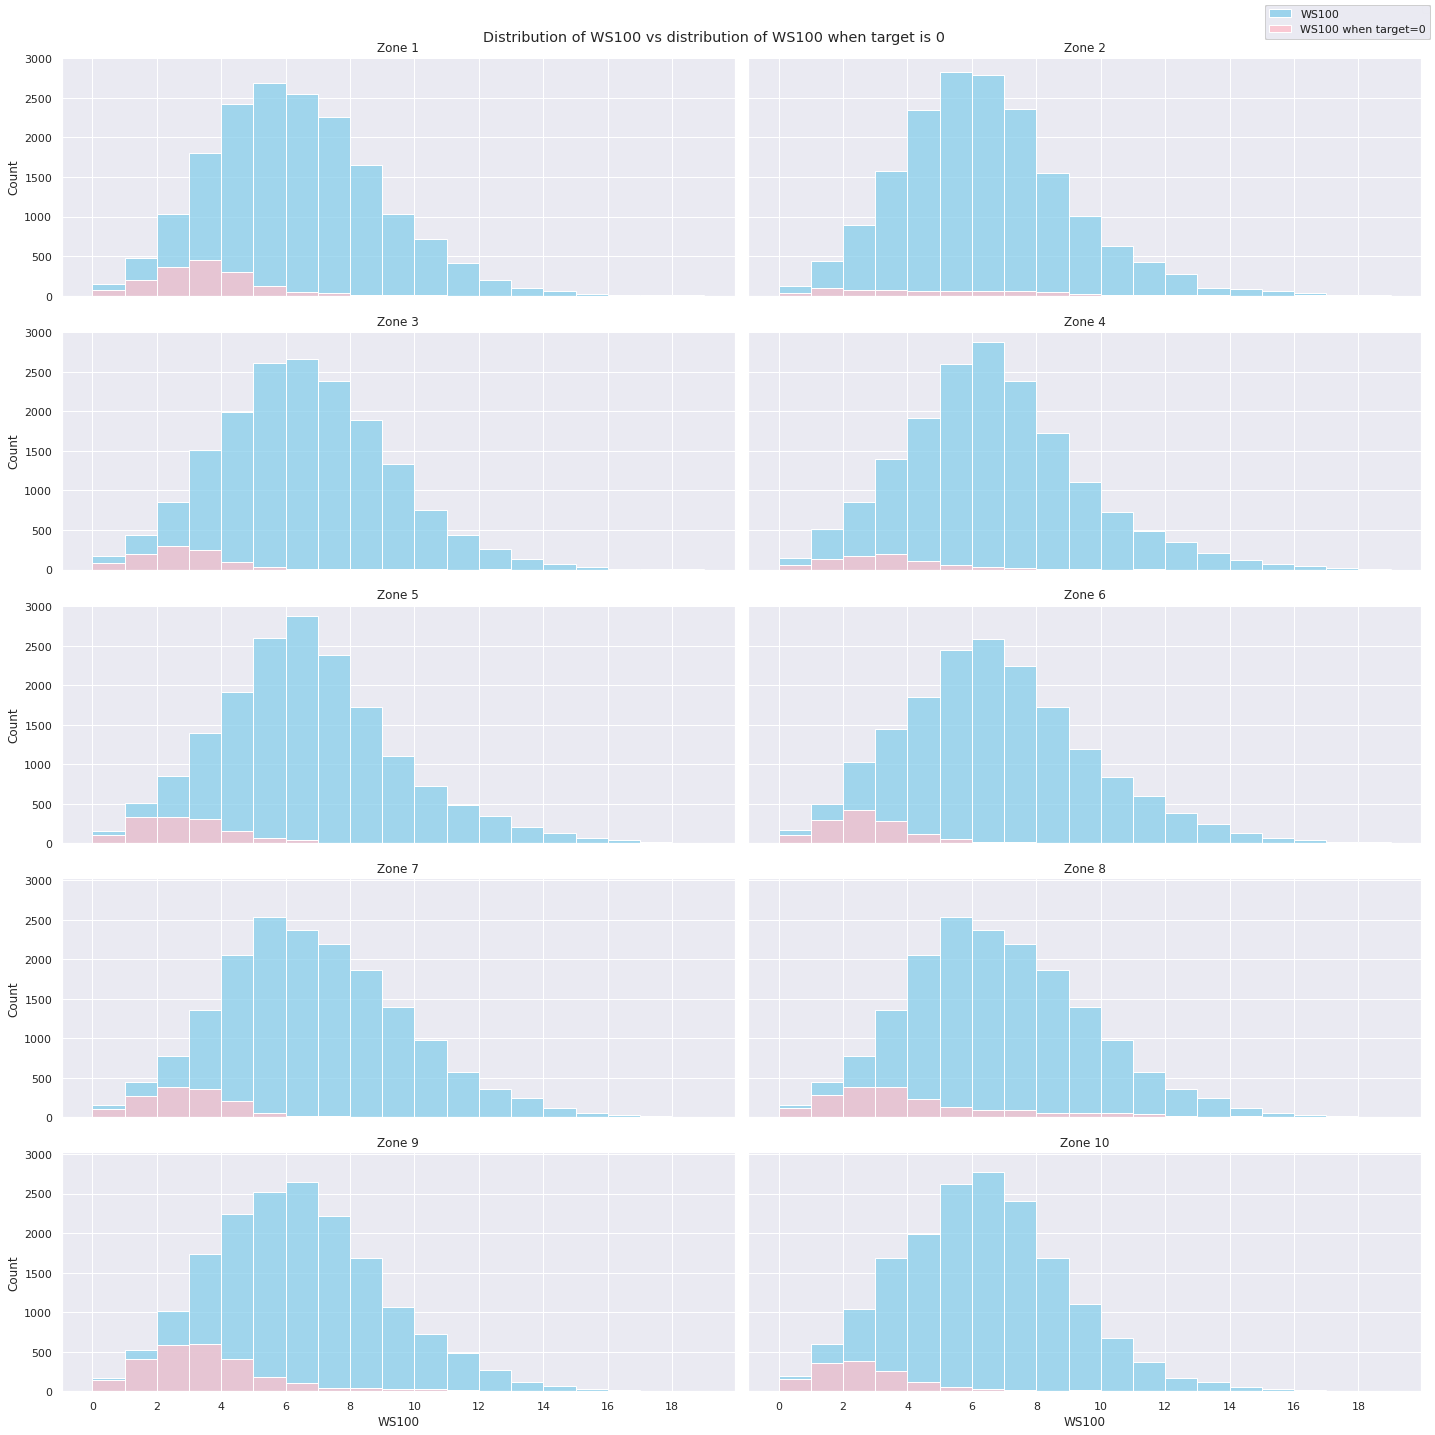

In [8]:
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(20,20), sharex=True, sharey=True)
fig.suptitle('Distribution of WS100 vs distribution of WS100 when target is 0')

axs = axs.ravel()

for zone in df.ZONEID.unique():
    ax = axs[zone-1]
    fig.legend(labels = ["WS100", "WS100 when target=0"])
    df_zeros = df[(df['TARGETVAR'] == 0) & (df['ZONEID'] == zone)]
    sns.histplot(df[df['ZONEID'] == zone], x='WS100', color='skyblue', ax=ax, bins=range(0,20,1));
    sns.histplot(df_zeros, x='WS100', color='pink', ax=ax,bins=range(0,20,1));
    ax.set_xticks(range(0,20,2));
    ax.set_title('Zone {}'.format(zone))
    
plt.tight_layout()

Histogram Wind Speed 100 for TARGETVAR = 0'

In [10]:
def round_ws(ws, dec):
    ws_rounded = np.round(ws / dec, 0) * dec
    return ws_rounded

df['ws100_rd'] = df.WS100.apply(lambda x: round_ws(x, 2))
df.head()

,ZONEID,TIMESTAMP,TARGETVAR,U10,V10,U100,V100,HOUR,MONTH,WEEKDAY,...,WD10CARD_NW,WD10CARD_S,WD10CARD_SE,WD10CARD_SSE,WD10CARD_SSW,WD10CARD_SW,WD10CARD_W,WD10CARD_WNW,WD10CARD_WSW,ws100_rd
0,1,2012-01-01 01:00:00,0.000000,2.124600,-2.681966,2.864280,-3.666076,1,1,6,...,1,0,0,0,0,0,0,0,0,4.0
1,1,2012-01-01 02:00:00,0.054879,2.521695,-1.796960,3.344859,-2.464761,2,1,6,...,1,0,0,0,0,0,0,0,0,4.0
2,1,2012-01-01 03:00:00,0.110234,2.672210,-0.822516,3.508448,-1.214093,3,1,6,...,0,0,0,0,0,0,0,1,0,4.0
3,1,2012-01-01 04:00:00,0.165116,2.457504,-0.143642,3.215233,-0.355546,4,1,6,...,0,0,0,0,0,0,1,0,0,4.0
4,1,2012-01-01 05:00:00,0.156940,2.245898,0.389576,2.957678,0.332701,5,1,6,...,0,0,0,0,0,0,1,0,0,2.0


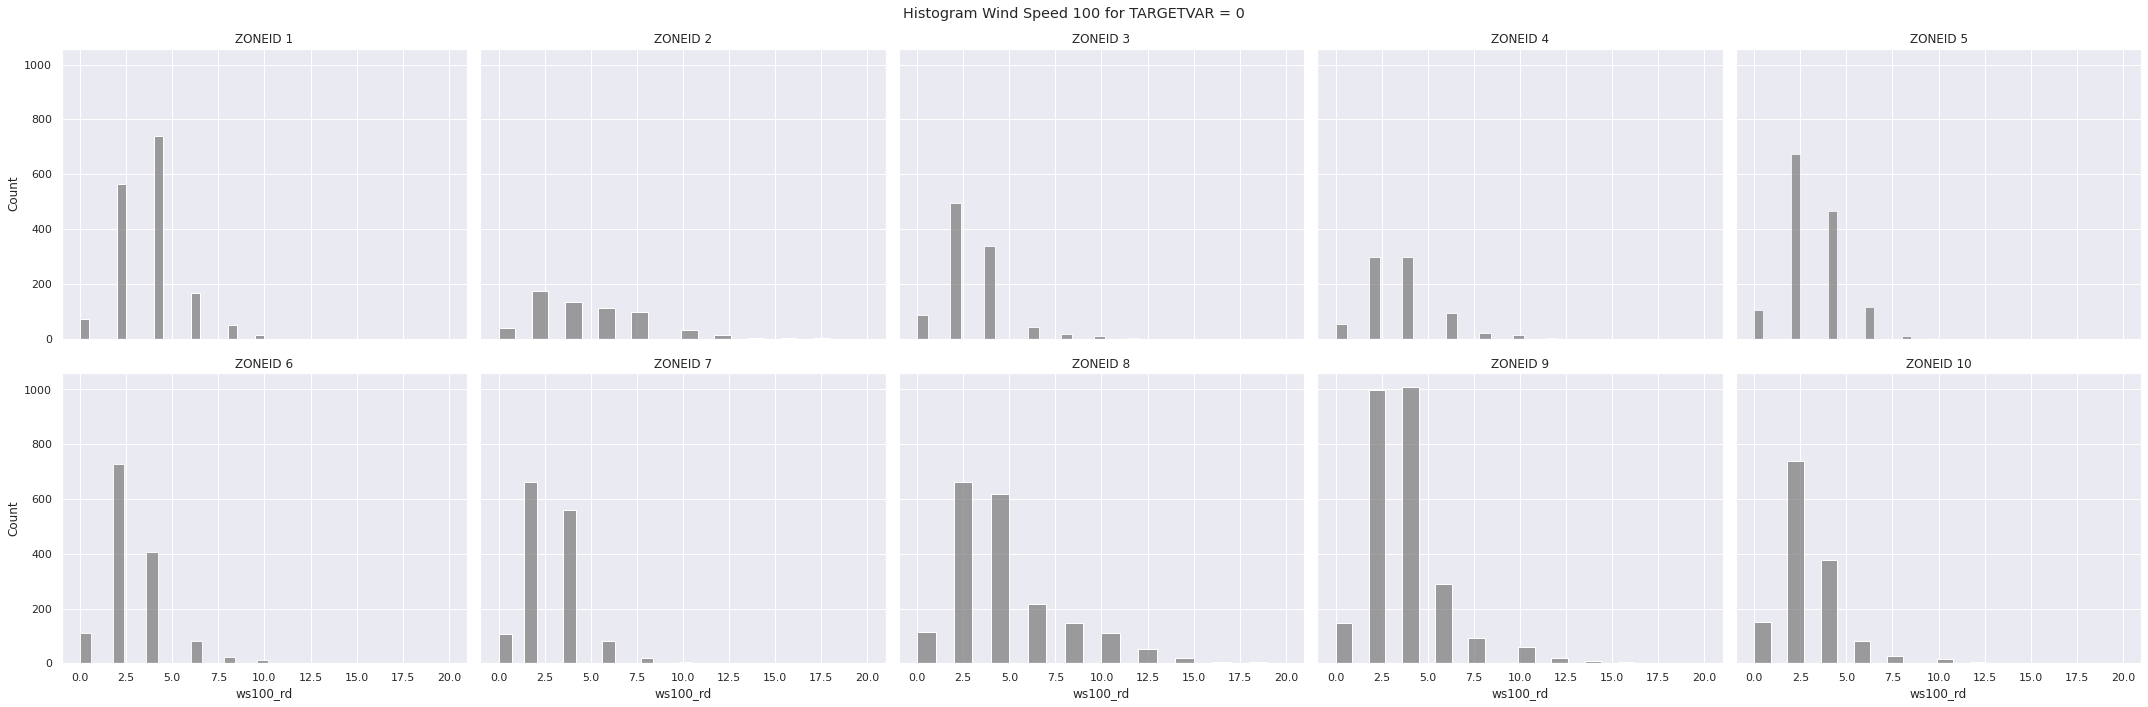

In [11]:
df_zero = df[df.TARGETVAR == 0 | df.TARGETVAR.isna()]
zones = df_zero.ZONEID.unique()

fig, axs = plt.subplots(2,5,figsize = (30, 10), sharey = True, sharex = True)

axs = axs.ravel()

for zone in zones:
    sns.histplot(data = df_zero[df_zero['ZONEID'] == zone], x = 'ws100_rd', ax = axs[zone - 1], color= "gray", bins = 20)
    axs[zone - 1].set_title('ZONEID '+ str(zone))
    
fig.suptitle('Histogram Wind Speed 100 for TARGETVAR = 0')

fig.tight_layout()


How many hours is the target = 0 per month per windfarm in 2012 ? There is no clear pattern to see.

In [ ]:
# 2012
df_2012 = df.copy()
df_2012 = df_2012[df_2012['TIMESTAMP'] < '2013-01-01 01:00:00']

months = list(calendar.month_name)
months.pop(0)
df_2012_hours = pd.DataFrame(index=months)                          

for zone in df_2012.ZONEID.unique():
    df_2012_hours['Windfarm {}'.format(zone)] = \
        df_2012[(df_2012['TARGETVAR']==0) & (df_2012['ZONEID']== zone)].groupby('MONTH').count().ZONEID.values
    
df_2012_hours    


,Windfarm 1,Windfarm 2,Windfarm 3,Windfarm 4,Windfarm 5,Windfarm 6,Windfarm 7,Windfarm 8,Windfarm 9,Windfarm 10
January,19,4,18,10,18,21,16,20,108,14
February,46,50,51,41,56,67,32,68,101,33
March,103,19,48,42,47,52,87,105,180,53
April,59,16,133,66,150,111,47,147,259,84
May,94,22,46,37,68,73,97,134,218,75
June,93,2,12,8,14,12,92,95,195,31
July,132,39,64,44,53,46,124,125,214,83
August,41,12,16,29,45,42,27,50,52,58
September,90,7,82,19,64,70,88,104,127,41
October,75,3,39,47,80,78,80,76,160,46


Plotting consecutive hours with zero energy output per windfram per month.

In [ ]:
def find_consecutive_hours(df_year, duration):
    # all consecutive hours for each windfarm
    all_results = []

    for zone in df_year.ZONEID.unique():
        # row numbers in the dataframe of hours when target = 0 
        hours = []

        # row numbers in the dataframe of the consecutive intervals when target = 0
        results = []
        df_zone = df_year[(df_year['ZONEID']==zone)]
    
        # find hours where target = 0
        for index, rows in df_zone.iterrows():
            if rows['TARGETVAR'] == 0:
                hours.append(index)

        # find consecutive hours
        for k, g in groupby(enumerate(hours), lambda ix : ix[0] - ix[1]):
            consectuive_hours = list(map(itemgetter(1), g))
            if (len(consectuive_hours) > duration): 
                results.append(consectuive_hours)        
            
        all_results.append(results)
    return all_results

In [ ]:
def create_df_plot(all_results, df_year):
    df_plot = pd.DataFrame(columns=['ZONEID','TIMESTAMP', 'COUNT' ])
    for i in range(len(all_results)):
        for j in range(len(all_results[i])):
            df_plot = df_plot.append({'TIMESTAMP': df_year.loc[all_results[i][j][0],'TIMESTAMP'],
                                      'COUNT':len(all_results[i][j]),
                                      'ZONEID':i+1}, ignore_index=True)
                        
    df_plot['MONTH'] = pd.DatetimeIndex(df_plot['TIMESTAMP']).month_name().str[:3]
    df_plot.drop('TIMESTAMP', axis = 1)
    return df_plot

In [ ]:
def adjust_df_plot(df_plot):
    for zone in df_plot.ZONEID.unique():
        df_zone = df_plot[df_plot['ZONEID']==zone]
        for i in range(len(df_plot.MONTH.unique())):
            if df_plot.MONTH.unique()[i] not in df_zone.MONTH.unique():
                df_plot = df_plot.append({'MONTH': df_plot.MONTH.unique()[i], 
                                          'COUNT':0, 
                                          'ZONEID':zone}, ignore_index=True)
            
    return df_plot

In [ ]:
def plot_consecutive_hours(year, duration):
    # create dataframe for year
    df_year = df.copy()
    if (year==2012): df_year = df_year[df_year['TIMESTAMP'] < '2013-01-01 01:00:00']
    if (year==2013): df_year = df_year[df_year['TIMESTAMP'] >= '2013-01-01 01:00:00']

    # find consecutive hours for every month/windfarm in year
    # duration is the number of consecutve hours
    all_results = find_consecutive_hours(df_year, duration)

    # create data frame with the data needed for the plot
    df_plot = create_df_plot(all_results, df_year)

    df_plot = adjust_df_plot(df_plot)

    month_order = ['Jan', 'Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

    fig, ax = plt.subplots(nrows=2, ncols=5, sharey=True, figsize=(20,10))
    fig.suptitle('Number of consecutive hours (more than {} hrs duration) with zero energy output {}'.format(duration, year))
    for zone in df.ZONEID.unique():
        plt.subplot(2,5,zone)   
        plt.title("Windfarm {}".format(zone))
        plt.xticks(rotation = 45)
        df_zone = df_plot[df_plot['ZONEID']==zone].groupby('MONTH').sum()
        df_zone = df_zone.reindex(month_order, axis=0)
        sns.barplot(x=df_zone.index, y= df_zone.COUNT, color='green')
    
    fig.tight_layout();

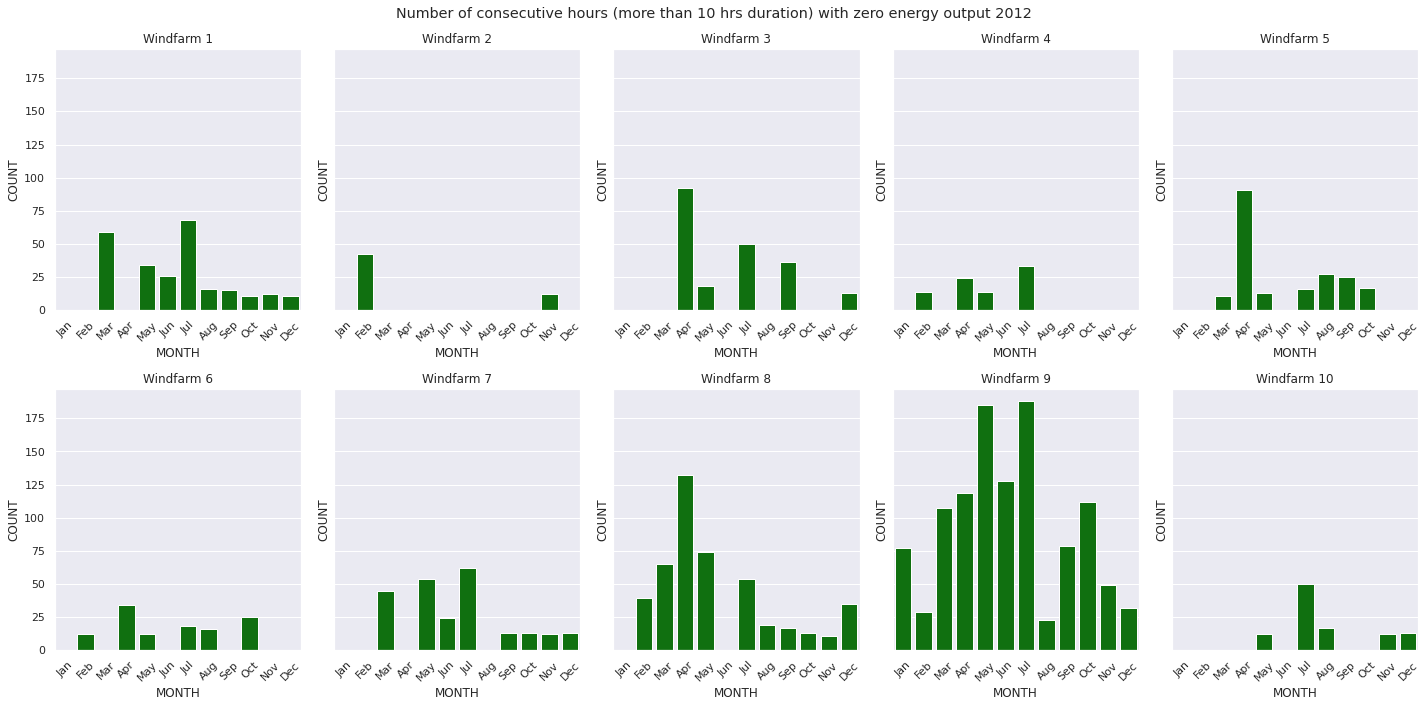

In [ ]:
# plot for 2012, with more than 10 hours downtime
plot_consecutive_hours(2012, 10)

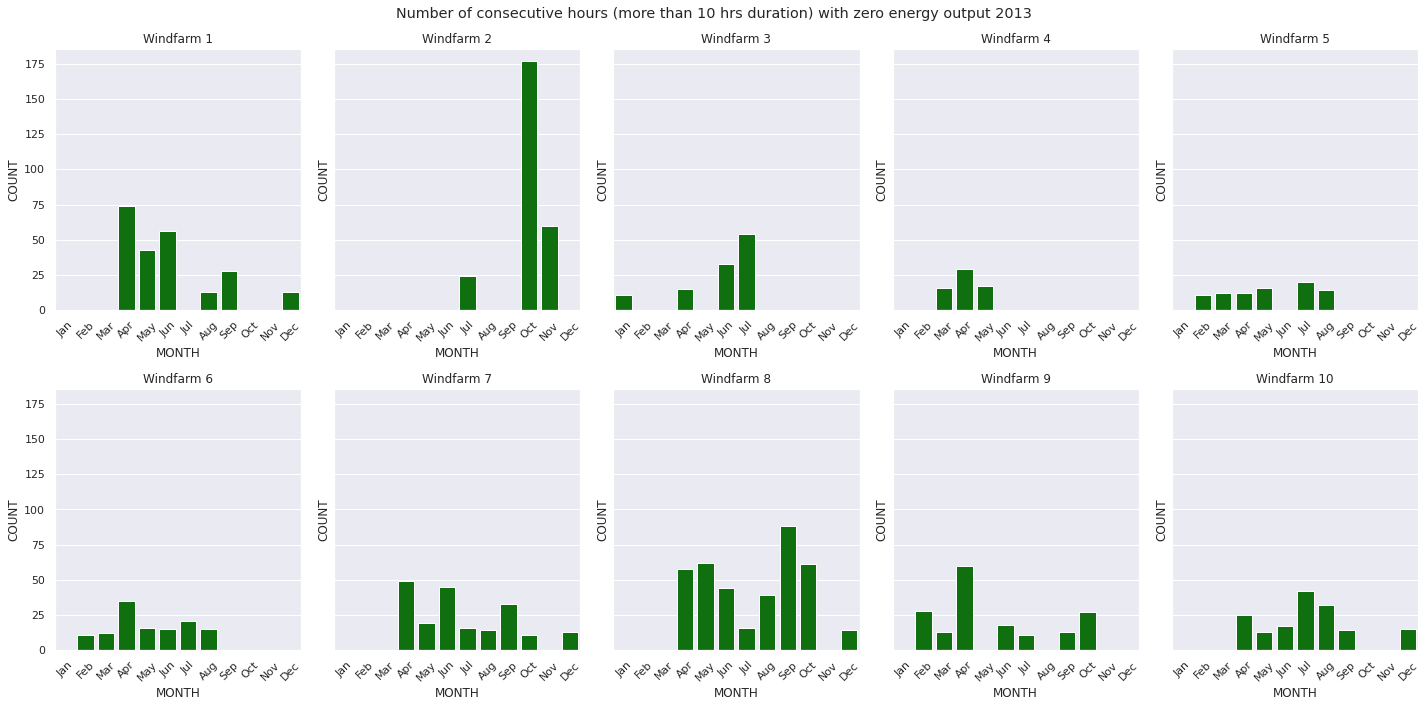

In [ ]:
# plot for 2013, with more than 10 hours downtime
plot_consecutive_hours(2013, 10)

There is no clear pattern. In 2012 Windfarm 9 had a lot of down times, with length of more than hours each time, while in 2013 this is not the case.